## A/B Test: Ads Click Through Rate

### Launched two versions of website, we try to find out whether newer Version B really outperforms A, because version B exhibits higher conversion rate (conversion rate (CTR) = subscription number/visit number) in 2 weeks. 550 users will be directed to Version A and 450 to B. In A, 48 user converted. CTR of A = 0.087. For B, 56 version converted. CTR of B = 0.1244. 

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom
from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')

In [2]:
# A: control group --- B: test group

Sub_A, Sub_B = 48, 56 # convert number

n_A, n_B = 550, 450 #sample size for each group

rate_A, rate_B = Sub_A / n_A, Sub_B / n_B #Convert Rate

#### Since there are only two scenarios, subscribe or not. Two discrete options fit binomial distribution. 
#### 1 for Conversion 
#### 0 else
#### We know conversion is a normally distributed random variable,  so the sum (of difference) is also a normal distribution. Therefore, we have

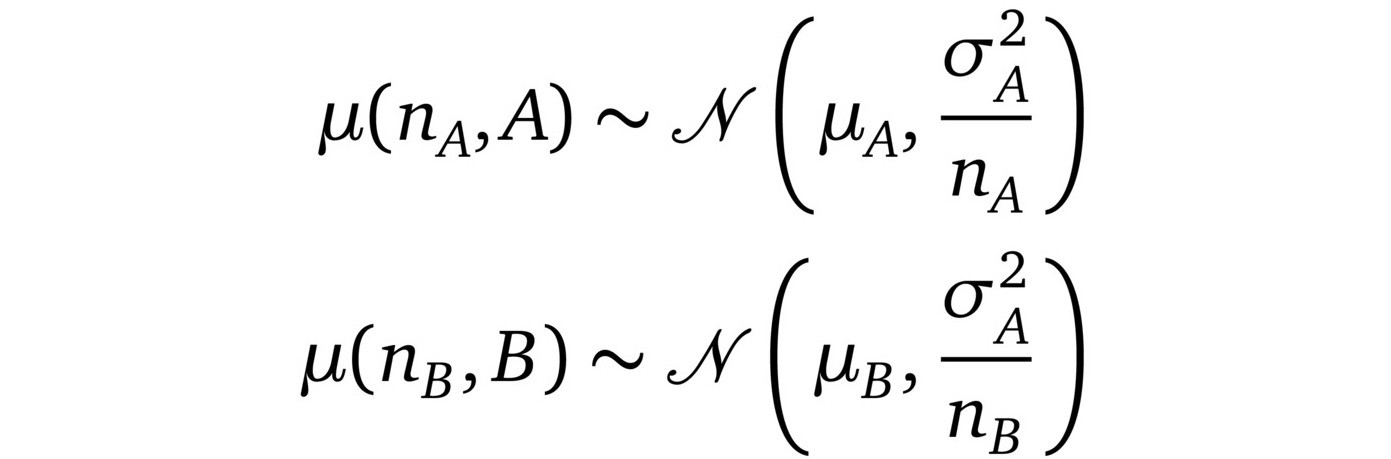

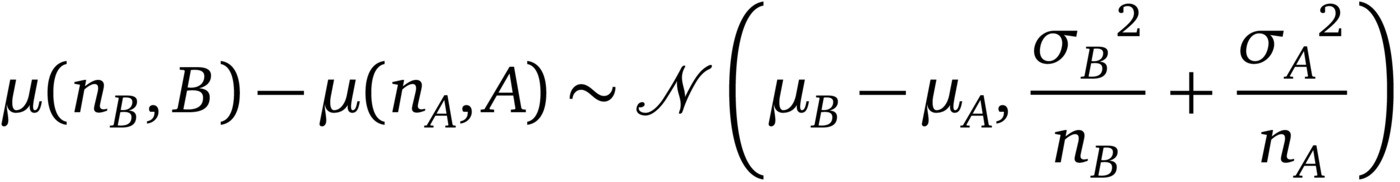

In [3]:
from IPython.display import display
from IPython.display import Image
x = Image(filename='Distribution.jpeg', width=500, height=500)
y = Image(filename='Distribution_2.jpeg', width=500, height=500)
display(x, y)

In [4]:
# calcualte standard deviation of the mean
std_A = np.sqrt(rate_A * (1-rate_A)) / np.sqrt(n_A)
std_B = np.sqrt(rate_B * (1-rate_B)) / np.sqrt(n_B)

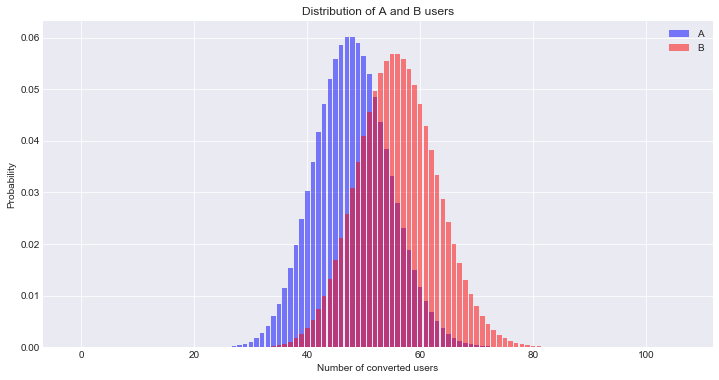

In [5]:
sns.set_style("darkgrid")

fig, ax = plt.subplots(figsize=(12,6))
x_A = np.linspace(Sub_A-49, Sub_A+50, 100)
yA = binom(n_A, rate_A).pmf(x_A)
ax.bar(x_A, yA, alpha=0.5,color='blue',label='A')

x_B = np.linspace(Sub_B-49, Sub_B+50, 100)
yB = binom(n_B, rate_B).pmf(x_B)
ax.bar(x_B, yB, alpha=0.5,color='red',label='B')
plt.title('Distribution of A and B users')
plt.xlabel('Number of converted users')
plt.ylabel('Probability')
plt.legend()
plt.show()

#### From above distributions, we can see A has more users converted in certain cases.

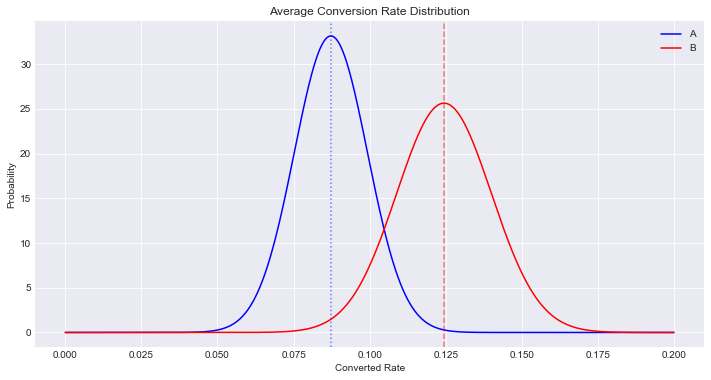

In [6]:
fig, ax = plt.subplots(figsize=(12,6))
x = np.linspace(0, .2, 1000)
ax.plot(x, norm(rate_A, std_A).pdf(x),color='blue',label='A')
ax.axvline(x=rate_A, c='blue',alpha=0.5, linestyle=':')

ax.plot(x, norm(rate_B, std_B).pdf(x),color='red',label='B')
ax.axvline(x=rate_B, c='red',alpha=0.5,  linestyle='--')
plt.title('Average Conversion Rate Distribution')
plt.xlabel('Converted Rate')
plt.ylabel('Probability')
plt.legend()
plt.show()

#### We have a clearer view that Version B has a slightly higher conversion rate mean and wider standard deviation.

### Conduct Z Test for two samples
#### Null hypothesis H0:  the conversion rate is the same for the two versions 
#### Alternative hypothesis H1: the conversion rate is higher for version B
#### Under H₀, μ(A) = μ(B) and model Z 

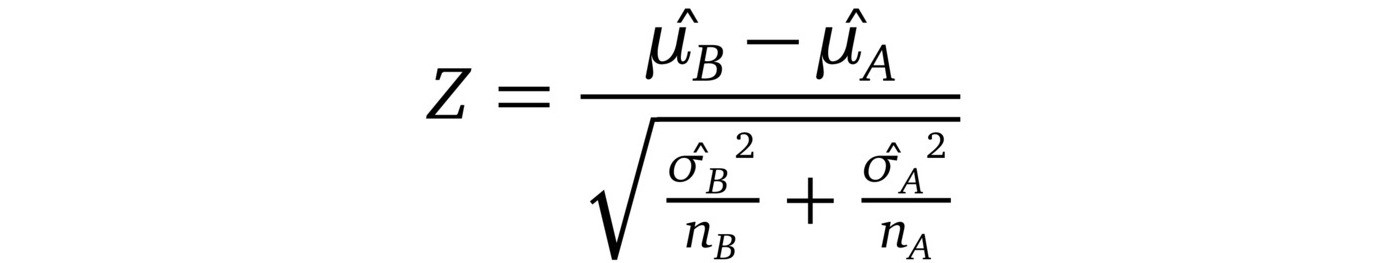

In [7]:
Image(filename='Z.jpeg', width=500, height=500)

In [8]:
#calculate Z Score and p-value
var_A = rate_A*(1-rate_A)
var_B = rate_B*(1-rate_B)
Z = round((rate_B - rate_A)/np.sqrt(var_B/n_B + var_A/n_A),4)
p_value = round(norm.sf(Z),4)
print("Z-score: {0}\np-value: {1}".format(Z,p_value))
if p_value<0.05:
    print("Reject null hypothesis: Version B has higher Conversion Rate")
else:
    print("Accept null hypothesis")

Z-score: 1.8896
p-value: 0.0294
Reject null hypothesis: Version B has higher Conversion Rate


#### The way to interpret this P value is given the null hypothesis is true (that B is less than or equal to A), we would expect to get this result or a result more extreme only 2.9% of the time. As that is a significant result (typically p < 5%), we reject the null hypothesis, and state that we have evidence that B > A.

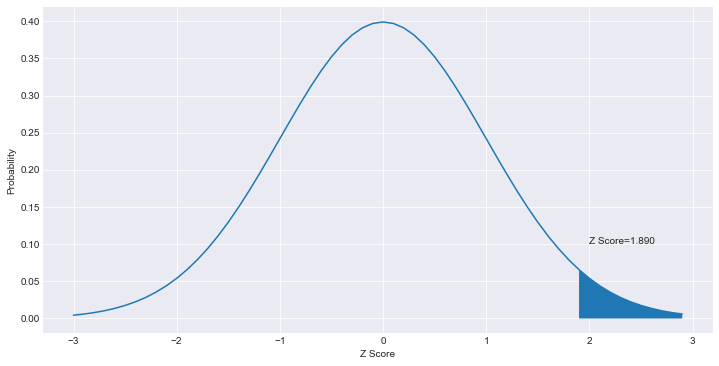

In [9]:
z = np.arange(-3, 3, 0.1)
plt.figure(figsize=(12,6))
plt.plot(z, norm.pdf(z))
plt.fill_between(z[z>Z], norm.pdf(z[z>Z]))
plt.annotate(f"Z Score={Z:0.3f}  ", (2, 0.1))
plt.ylabel('Probability')
plt.xlabel('Z Score')
plt.show()